# Predicting housing prices using Regression Algorithms on Boston Housing Dataset

In the notebook, I ahve applied multiple regression algorithms on the Boston Housing Dataset. I have downloaded the dataset from the following link: [Kaggle_Boston_Housing_Dataset](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data)

I have divided the notebook in multiple sections. I have first loaded the packages and data, performed exploratory data analysis, split the dataset and applied the regression algorithms. 

## Section 1: Loading the Packages

In [80]:
#Importing the packages required for the Regression Operation
#Importing standard packages
import pandas as pd
import numpy as np

#Importing visualization packages
import seaborn as sns 
import matplotlib.pyplot as plt  
import plotly.express as px

#Importing the necessary libraries from the sci-kit learn package
from sklearn.model_selection import train_test_split

#Importing the necessary Regression libraries:
#Importing the Linear Regression library:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#Importing KNN library:
from sklearn.neighbors import KNeighborsRegressor
#Importing the Random Forest library:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#Importing the Ridge Regression library:
from sklearn.linear_model import Ridge
#Importing the Decision Tree library:
from sklearn.tree import DecisionTreeRegressor
#Importing the Support Vector Machine(SVM) library:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Importing the Multi-Layer Perceptron(MLP) library:
from sklearn.neural_network import MLPRegressor

#Importing the metrics to evaluate models:
from sklearn import metrics
from sklearn.metrics import r2_score

## Section 2: Loading the Data 

I am using the Boston Housing Dataset in the following Notebook. 
I am listing the Input features in order:

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

Output variable:

1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [2]:
#Importing data set in Galway_Rentals, it is named 'Galway_Rentals', throughout the code. 
Boston_Housing_Data = pd.read_csv('boston.csv')
#Displyaing the Galway_Rentals data set
Boston_Housing_Data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Section 3: Exploratory Data Analysis

In the below sections I am conducting a cursory analysis of the dataset. I am initially analyzing the data types of the features and plotting the distribution and correlation of the features. 

In [3]:
Boston_Housing_Data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

All of the feature variables in the data is continous so it is not required to perform any encoding on any of the features. I am printing the description of all the fetures in the dataset below. 

In [30]:
Boston_Housing_Data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

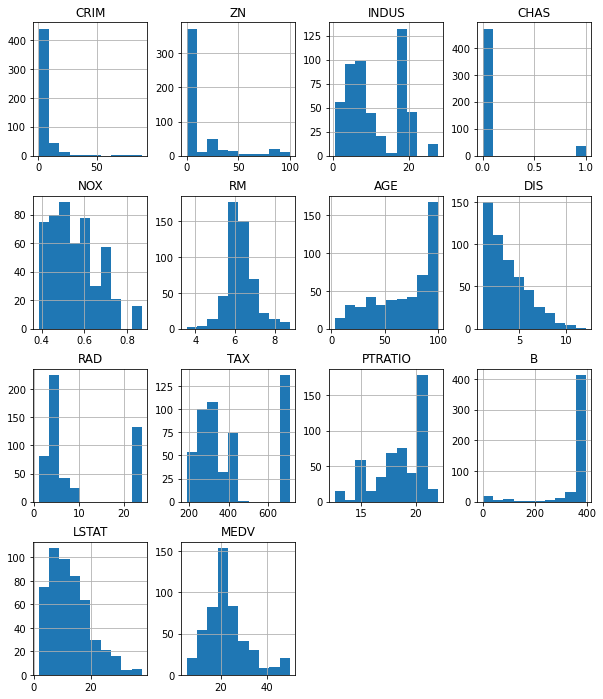

In [31]:
#Plotting the distribution of the feature vectors:

Boston_Housing_Data.hist(figsize=(10,12))

<AxesSubplot:>

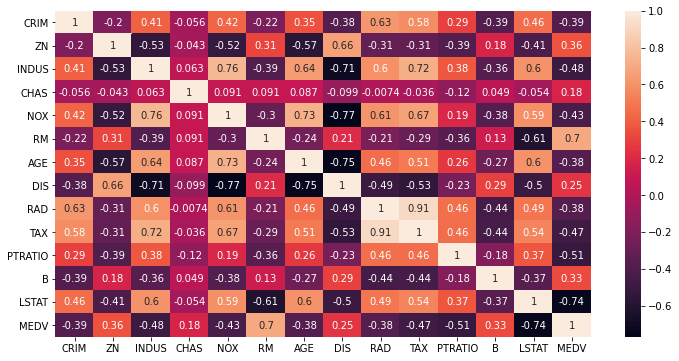

In [32]:
#Plotting the correlation of the features in the dataset. 

plt.figure(figsize=(12,6))
sns.heatmap(Boston_Housing_Data.corr(), annot=True)

In [99]:
#Plotting the distribution of the target variable, MEDV

fig = px.bar(Boston_Housing_Data, y="MEDV", title="Distribution of the Median value of owner-occupied homes", labels={"MEDV":"Median value of owner-occupied homes in $1000's"})            
fig

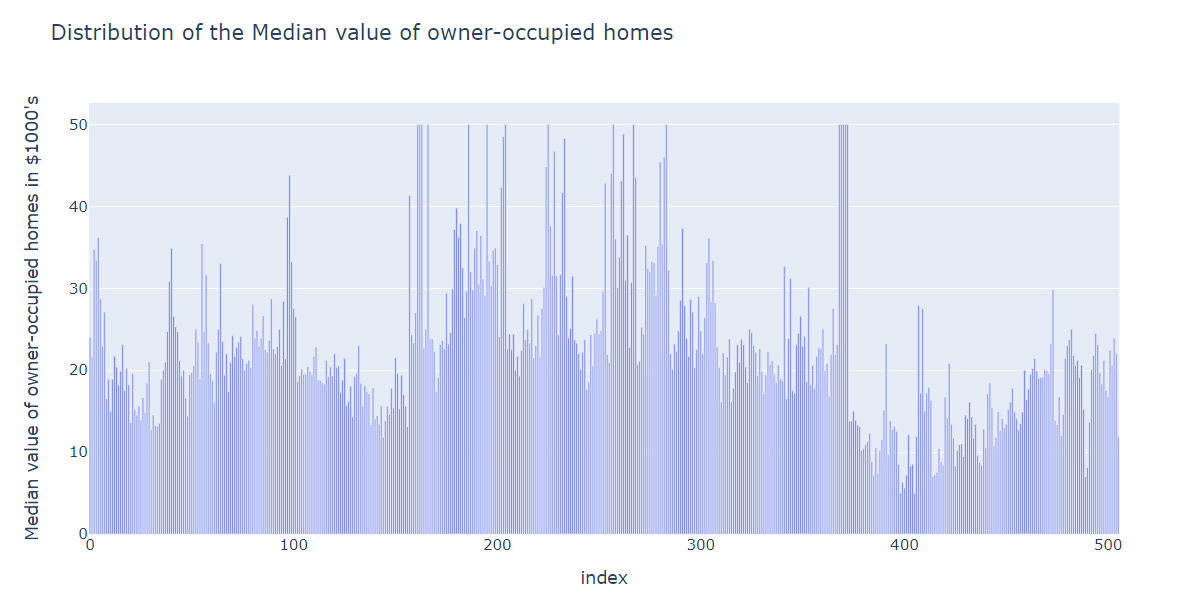

## Section 4: Data Split

In the below section, I am splitting the dataset into train and test sets to be used to apply the regression algorithms. I am doing a 70:30 split on the data. 70% of the data will be used in training and 30% of the data will be used for testing. 

In [48]:
#Data Split

#Isolating the target variable
y=Boston_Housing_Data['MEDV']
#Dropping the target variable from the dataset. 
X=Boston_Housing_Data.drop(['MEDV'],axis=1)

#Now that we have divided the data set into X(Independent variables) and y (target variable), we will split it into train and test data sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, shuffle=True)

## Section 5: Regression Algorithms

In the below snippets, I am implementing Regression Algorithms on the train and test data. I have applied the Regression algorithms and have computed their performance on the following metrics: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R2 Score. As I am applying the regression algorithm it won't be possible to calculate the accuracy scores. 

## Linear Regression

In [72]:
#Defining the Linear Regression Model
Linear_Regression_Model = LinearRegression()
#I am fitting the training data into the Linear Regression Model 
Linear_Regression_Model.fit(X_train,y_train)
#Predicting using the trained model
y_pred_LR = Linear_Regression_Model.predict(X_test)

#Evaluating the Linear_Regression_Model
#I am carrying out a cursory evaluation of the Regression Model, to understand how it has behaved. 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_LR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_LR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))
print('R2 Score:',r2_score(y_test, y_pred_LR))

Mean Absolute Error: 3.907966145625533
Mean Squared Error: 31.82963115555763
Root Mean Squared Error: 5.641775532184671
R2 Score: 0.7215519718844159


## K-Nearest Neighbour Regression

In [83]:
#KNN Regression 
#Fitting the data in model and predicting on test set
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('R2 Score:',r2_score(y_test, y_pred_knn))

Mean Absolute Error: 5.058388157894737
Mean Squared Error: 55.169214638157904
Root Mean Squared Error: 7.427598174252421
R2 Score: 0.5173755249124765


## Random Forest Regression

In [82]:
#Random Forest Regression
#Fitting the data in model and predicting on test set
Random_Forest_Regressor = RandomForestRegressor(max_depth=2, random_state=0)
Random_Forest_Regressor.fit(X_train, y_train)
y_pred_RF = Random_Forest_Regressor.predict(X_test)

#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R2 Score:',r2_score(y_test, y_pred_RF))

Mean Absolute Error: 4.101484034569774
Mean Squared Error: 34.21381530851465
Root Mean Squared Error: 5.849257671578048
R2 Score: 0.7006949480373335


## Ridge Regression

In [84]:
#Ridge Regression
#Fitting the data in model and predicting on test set
Ridge_Regression = Ridge(alpha=1.0)
Ridge_Regression.fit(X_train, y_train)
y_pred_Ridge = Ridge_Regression.predict(X_test)

#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge)))
print('R2 Score:',r2_score(y_test, y_pred_Ridge))

Mean Absolute Error: 3.901418957290954
Mean Squared Error: 32.034536822514696
Root Mean Squared Error: 5.659906078948191
R2 Score: 0.7197594415646311


## Lasso Regression

In [85]:
#Lasso Regression
#Fitting the data in model and predicting on test set
Lasso_Regression = linear_model.Lasso(alpha=0.1)
Lasso_Regression.fit(X_train, y_train)
y_pred_Lasso = Lasso_Regression.predict(X_test)

#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Lasso)))
print('R2 Score:',r2_score(y_test, y_pred_Lasso))

Mean Absolute Error: 3.95283529017955
Mean Squared Error: 32.79064914847287
Root Mean Squared Error: 5.7263120023687915
R2 Score: 0.7131449135744071


## Decision Tree Regression

In [86]:
#Decision Tree Regression
#Fitting the data in model and predicting on test set
DT_Regression = DecisionTreeRegressor(random_state=0)
DT_Regression.fit(X_train, y_train)
y_pred_DT = DT_Regression.predict(X_test)

#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_DT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_DT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))
print('R2 Score:',r2_score(y_test, y_pred_DT))

Mean Absolute Error: 4.1059210526315795
Mean Squared Error: 42.25177631578948
Root Mean Squared Error: 6.500136638239959
R2 Score: 0.6303782553428019


## SVM (Support Vector Machine)

In [89]:
#SVM (Support Vector Machine)
#Fitting the data in model and predicting on test set
SVM = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)

#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_SVM))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SVM))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVM)))
print('R2 Score:',r2_score(y_test, y_pred_SVM))

Mean Absolute Error: 4.328450010503336
Mean Squared Error: 52.627188604472224
Root Mean Squared Error: 7.254459911287141
R2 Score: 0.5396133615069061


## Muti-Layer Perceptron (MLP) Regression

In [88]:
#Muti-Layer Perceptron (MLP) Regression
#Fitting the data in model and predicting on test set
MLP = MLPRegressor(random_state=1, max_iter=500)
MLP.fit(X_train, y_train)
y_pred_MLP = MLP.predict(X_test)

#Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_MLP))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_MLP))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_MLP)))
print('R2 Score:',r2_score(y_test, y_pred_MLP))

Mean Absolute Error: 4.00751683245352
Mean Squared Error: 30.32122794927386
Root Mean Squared Error: 5.506471460860745
R2 Score: 0.7347475975685547


## <center> Table of the Performance of the Regression Algorithms


| Regression Algorithm | MAE | MSE | RMSE | R2 |
| :- | -: | :-: |:-: |:-: |
| Linear | 3.90 | 31.82 |5.64|0.72
| KNN | 5.05 | 55.17 |7.42|0.51
| RandomForest | 4.1 | 34.2 |5.84|0.70
| Ridge | 3.9 | 32.03 |5.66|0.72
| Lasso | 3.95 | 31.79 |5.72|0.71
| Decision Tree | 4.1 | 42.25 |6.5|0.63
| SVM | 4.3 | 52.62 |7.25|0.54
| MLP | 4. | 30.32 |5.5|0.73

## Discussion

From the results in the table above we can see that the R2 scores of the Linear, RandomForest, Ridge, Lasso, MLP Regression are among the highest, of them the performaance of the Ridge, Linear and MLP Regression are the best. The knn seems to be the worst performer among the lot, with quite low R2 scores. 

MAE, MSE, RMSE : On these factors as well the KNN seems to be the worst performer whereas Ridge, Linear and MLP Regression are the best. 

From this dataset, it is suggested to use either of the Ridge, Linear and MLP Regressions as they seem to be performing better than the others. 